# Assignment 3

Cassandra Maldonado

1. You have been looking at some historical social media data and notice something rather interesting! There is a non-trivial relationship between a specific company’s stock change and
their CEO’s social media activity. You approach the CEO activity as an observable random variable (let’s call it C) and the stock price change as a hidden random variable (because you
can’t know it until tomorrow comes, and let’s call it S).

From your dataset, you calculate the prior of the price of this stock. It fluctuates as below:
𝑃(S = increase) = 0.5
𝑃(S = decrease) = 0.5

And very interestingly, you find out that the CEO’s posts in fact say something about the stock change:
P(C|S)       CEO posts something
increase            0.7
decrease            0.9

With this statistic that you calculated, you want to develop an investment methodology to maximize
your expected gain.
U(a,S)    S=increase    S=decrease
a = BUY $1    +1            -1
a = SELL $1   -1            +1

a. If we see that the CEO posted something interesting on social media, what is the expected utility of buying vs selling $1 of company stock?

Prior Probability of the CEO Posting:
P(S = increase|C) = P(C|S = increase)P(S = increase)/P(C)

P(S = decrease|C) = P(C|S = decrease)P(S = decrease)/P(C)

Where P(C) = P(C|S = increase)P(S = increase) + P(C|S = decrease)P(S = decrease)

P(C) = (0.7 × 0.5) + (0.9 × 0.5) = 0.8

Posterior Probabilities using Bayes Theorem:

P(S = increase|C) = (0.7 × 0.5)/0.8 = 0.4375

P(S = decrease|C) = (0.9 × 0.5)/0.8 = 0.5625

For the expected utility:
Buying:

E[U(buy))] = 1 × P(S = increase|C) + (-1) × P(S = decrease|C)

= (1 × 0.4375) + (-1 × 0.5625) = -0.125

Selling:

E[U(sell)] = (-1) × P(S = increase|C) + 1 × P(S = decrease|C)

= (-1) × 0.4375 + 1 × 0.5625 = 0.125

Selling has higher expected utility 0.125 compared to buying -0.125. Selling has a positive expected utility and buying has a negative expected utility, I advice to sell the stock when the CEO posts something.

b. In the same problem, how the prior of stock price changing behavior should be such that buying would be more profitable than selling, when the CEO posts something online?

P(S = increase) = p and P(S = decrease) = 1-p

Following the Bayes calculation:

P(C) = 0.7p + 0.9(1-p)

P(S = increase|C) = (0.7p)/(0.7p + 0.9(1-p))

P(S = decrease|C) = (0.9(1-p))/(0.7p + 0.9(1-p))

For buying to be more profitable:
1 × P(S = increase|C) + (-1) × P(S = decrease|C) > (-1) × P(S = increase|C) + 1 × P(S = decrease|C)

P(S = increase|C) > P(S = decrease|C)

Therefore:

(0.7p)/(0.7p + 0.9(1-p)) > (0.9(1-p))/(0.7p + 0.9(1-p))

Solving this:

0.7p > 0.9(1-p)

0.7p > 0.9 - 0.9p

1.6p > 0.9

p > 0.5625

Therefore, the prior probability of stock increase should be greater than 0.5625, approximately 56.25%, for buying to be more profitable than selling when the CEO posts something.

2. You want to sample from the 2D distribution given below:

p(x,y) ∝ exp(-x^2 - y^2 - xy/3)(2 + x^2*sin(5y) + y^2*sin(3x))

Using the Metropolis Hasting algorithm, draw samples proportional to this distribution. Your proposal distribution can be symmetric Gaussian and you can sample x and y independently from their marginal proposal distributions. (draw as many as needed)

a. Show the histograms of your samples alongside the actual distribution. (Note: x and y vary between -2 and 2 only).

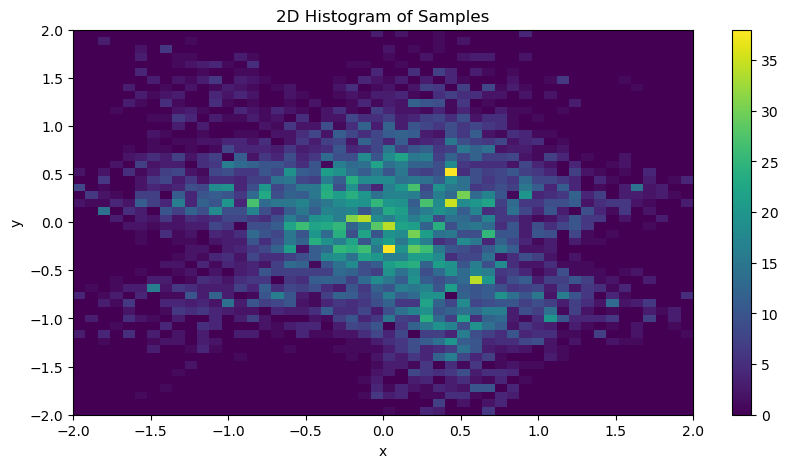

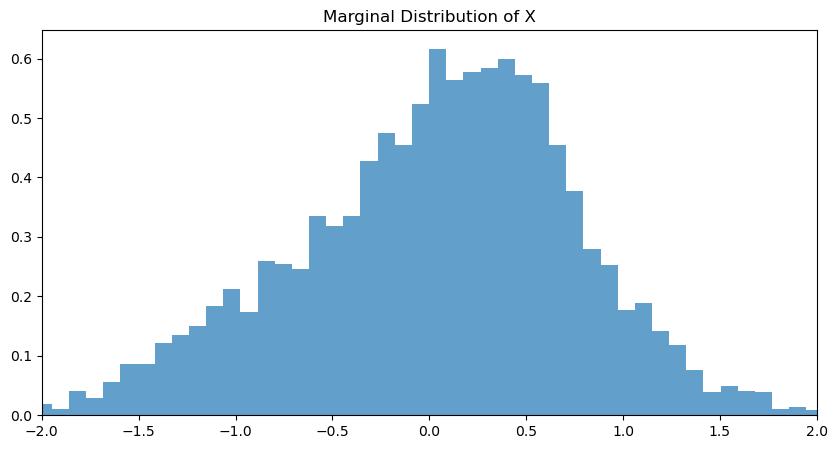

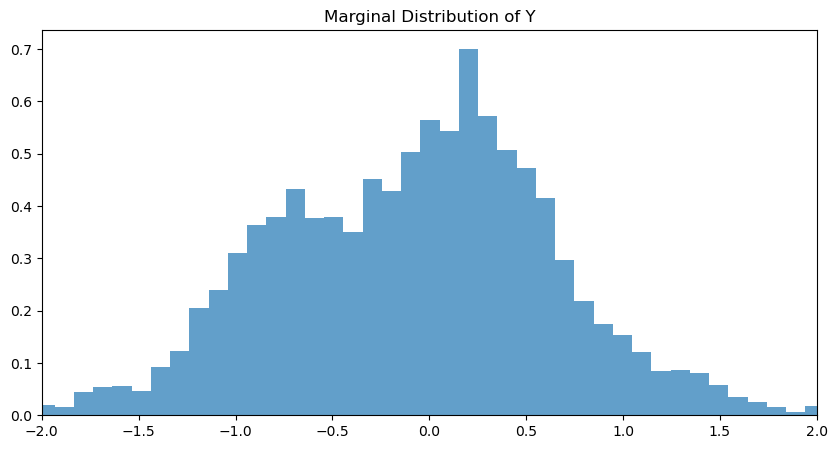

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def target_distribution(x, y):
    """
    Target distribution p(x,y) ∝ exp(-x^2 - y^2 - xy/3)(2 + x^2*sin(5y) + y^2*sin(3x))
    """
    exponent = -x**2 - y**2 - (x*y)/3
    multiplicative = 2 + x**2 * np.sin(5*y) + y**2 * np.sin(3*x)
    return np.exp(exponent) * multiplicative

def metropolis_hastings(n_samples):
    # Initialize arrays to store samples
    samples_x = np.zeros(n_samples)
    samples_y = np.zeros(n_samples)
    
    # Starting from random point
    current_x = np.random.normal(0, 0.5)
    current_y = np.random.normal(0, 0.5)
    
    # Proposal distribution standard deviation
    proposal_std = 0.5
    
    # Metropolis-Hastings algorithm
    for i in range(n_samples):
        # Propose new points
        proposed_x = current_x + np.random.normal(0, proposal_std)
        proposed_y = current_y + np.random.normal(0, proposal_std)
        
        # Acceptance ratio
        current_prob = target_distribution(current_x, current_y)
        proposed_prob = target_distribution(proposed_x, proposed_y)
        
        # Accept or reject
        if proposed_prob / current_prob > np.random.random():
            current_x = proposed_x
            current_y = proposed_y
            
        samples_x[i] = current_x
        samples_y[i] = current_y
    
    return samples_x, samples_y

# Samples
n_samples = 10000
samples_x, samples_y = metropolis_hastings(n_samples)

# 2D histogram plot
plt.figure(figsize=(10, 5))
plt.hist2d(samples_x, samples_y, bins=50, range=[[-2, 2], [-2, 2]], cmap='viridis')
plt.colorbar()
plt.title('2D Histogram of Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Marginal distribution of x plot
plt.figure(figsize=(10, 5))
plt.hist(samples_x, bins=50, density=True, alpha=0.7)
plt.title('Marginal Distribution of X')
plt.xlim(-2, 2)
plt.show()

# Marginal distribution of y plot
plt.figure(figsize=(10, 5))
plt.hist(samples_y, bins=50, density=True, alpha=0.7)
plt.title('Marginal Distribution of Y')
plt.xlim(-2, 2)
plt.show()

b. Using your MCMC samples, calculate E(X,Y).

In [5]:
expected_x = np.mean(samples_x)
expected_y = np.mean(samples_y)
print(f"E[X] ≈ {expected_x:.4f}")
print(f"E[Y] ≈ {expected_y:.4f}")

E[X] ≈ 0.0413
E[Y] ≈ -0.0786


c. Comment on effects of using too high or too low of standard deviations in the
proposal distribution.

Effects of proposal distribution standard deviation:

Too high σ: Large jumps lead to low acceptance rate and poor exploration.

Too low σ: Small jumps lead to high acceptance but slow mixing and correlation between samples.